<a href="https://colab.research.google.com/github/RadhitaPasha/Tugas_PCD_G231220121/blob/main/CNN_G231220121.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
from google.colab import files
uploaded = files.upload()

Saving dataset.zip to dataset (5).zip


In [39]:
import zipfile
import os

with zipfile.ZipFile('dataset.zip', 'r') as zip_ref:
    zip_ref.extractall('/content')

print(os.listdir('/content'))

['.config', 'dataset (4).zip', 'dataset (2).zip', 'dataset (5).zip', 'best_model.h5', 'model.tflite', 'dataset (1).zip', 'dataset', 'dataset (3).zip', 'drive', 'dataset.zip', 'saved_model', 'sample_data']


In [40]:
DATASET_DIR = '/content/dataset'
TRAIN_DIR = f'{DATASET_DIR}/train'
VAL_DIR   = f'{DATASET_DIR}/val'
TEST_DIR  = f'{DATASET_DIR}/test'

import os
print("Train:", os.path.exists(TRAIN_DIR))
print("Val:", os.path.exists(VAL_DIR))
print("Test:", os.path.exists(TEST_DIR))

Train: True
Val: True
Test: True


LOAD DATASET

In [42]:
import tensorflow as tf

IMG_SIZE = (224, 224)
BATCH_SIZE = 8

train_ds = tf.keras.utils.image_dataset_from_directory(
    TRAIN_DIR,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode='categorical'
)
class_names = train_ds.class_names
num_classes = len(class_names)

print("Classes:", class_names)

Found 4 files belonging to 4 classes.
Classes: ['bercak', 'jamur', 'layu', 'sehat']


NORMALISASI

In [44]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.map(lambda x, y: (x/255.0, y)).prefetch(AUTOTUNE)
# val_ds   = val_ds.map(lambda x, y: (x/255.0, y)).prefetch(AUTOTUNE)

MODEL CNN

In [45]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)),
    layers.MaxPooling2D(),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


COMPILE DAN TRAIN

In [47]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    train_ds,
    # validation_data=val_ds, # Commented out because val_ds is not defined
    epochs=10
)

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.2500 - loss: 1.3863
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 856ms/step - accuracy: 0.2500 - loss: 1.3841
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 861ms/step - accuracy: 0.2500 - loss: 1.3747
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 852ms/step - accuracy: 0.2500 - loss: 1.3604
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 805ms/step - accuracy: 0.2500 - loss: 1.3392
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.5000 - loss: 1.3411
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 845ms/step - accuracy: 0.2500 - loss: 1.3099
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.2500 - loss: 1.2664
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 849ms/step - accuracy: 0.7500 - loss: 1.2379
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.5000 - loss: 1.1635


EVALUASI

In [48]:
test_ds = tf.keras.utils.image_dataset_from_directory(
    TEST_DIR,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode='categorical'
)

test_ds = test_ds.map(lambda x, y: (x/255.0, y))

loss, acc = model.evaluate(test_ds)
print("Test Accuracy:", acc)

Found 4 files belonging to 4 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 567ms/step - accuracy: 0.2500 - loss: 107.3997
Test Accuracy: 0.25


TEST GAMBAR 1 PREDIKSI

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


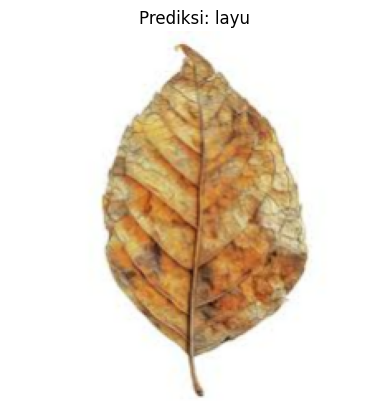

In [50]:
import numpy as np

for images, labels in test_ds.take(1):
    img = images[0].numpy()
    label = labels[0].numpy()

prediction = model.predict(np.expand_dims(img, axis=0))
pred_class = class_names[np.argmax(prediction)]

plt.imshow(img)
plt.title(f"Prediksi: {pred_class}")
plt.axis("off")
plt.show()